<a href="https://colab.research.google.com/github/hossainehsani1982/Azure_AI_Vison_Python/blob/main/niftyfifty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
!pip install pywaffle
!pip install pyngrok


from pyngrok import ngrok
ngrok.kill()
NGROK_AUTH_TOKEN = "2egL08it6fPbM8rbm9OkicUpPeo_5yC4GKMiyL6qrPT6m3HTo"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
ngrok.connect(8050)

!pip install dash

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import os

In [46]:
dfs = []
combined_dataset_path = '/content/datasets/combined_dataset.csv'

if os.path.isfile(combined_dataset_path):
    pass
else:
    for fileName in os.listdir('/content/datasets/'):
         if fileName.endswith('.csv'):
            df = pd.read_csv(os.path.join('/content/datasets/', fileName))
            df = df.iloc[:, :12]
            dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df.to_csv(combined_dataset_path, index=False)

In [47]:
df = pd.read_csv(combined_dataset_path)


<ipython-input-47-b82baf72ea2b>:1: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(combined_dataset_path)


Data Cleaning


In [48]:

#remove rows without date
df = df.dropna(subset=['Date'])

#remove rows with invalid date
date_pattern = r"\d{4}-\d{2}-\d{2}"
df = df[df['Date'].str.match(date_pattern)]

#remove rows with nan values
nan_columns = df.columns[df.isna().any()].tolist()
df.drop(nan_columns, axis=1, inplace=True)


Data Transformation



In [49]:
#convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
#replace date with year
df['Date'] = df['Date'].dt.year
#rename date column to year
df.rename(columns={'Date': 'Year'}, inplace=True)

print(df[['Year','Symbol', 'Open', 'Close', 'Volume']].head(100))


    Year      Symbol    Open   Close     Volume
0   2004  ULTRACEMCO  305.00  260.20  6633956.0
1   2004  ULTRACEMCO  262.00  255.55  2794161.0
2   2004  ULTRACEMCO  257.75  270.70  2340926.0
3   2004  ULTRACEMCO  272.00  262.25   915106.0
4   2004  ULTRACEMCO  263.70  266.10   387417.0
..   ...         ...     ...     ...        ...
95  2005  ULTRACEMCO  350.00  333.65    76718.0
96  2005  ULTRACEMCO  338.90  339.70   238665.0
97  2005  ULTRACEMCO  343.00  324.65   161462.0
98  2005  ULTRACEMCO  325.00  320.10    79473.0
99  2005  ULTRACEMCO  330.00  318.70   157844.0

[100 rows x 5 columns]


*Plot* column chart


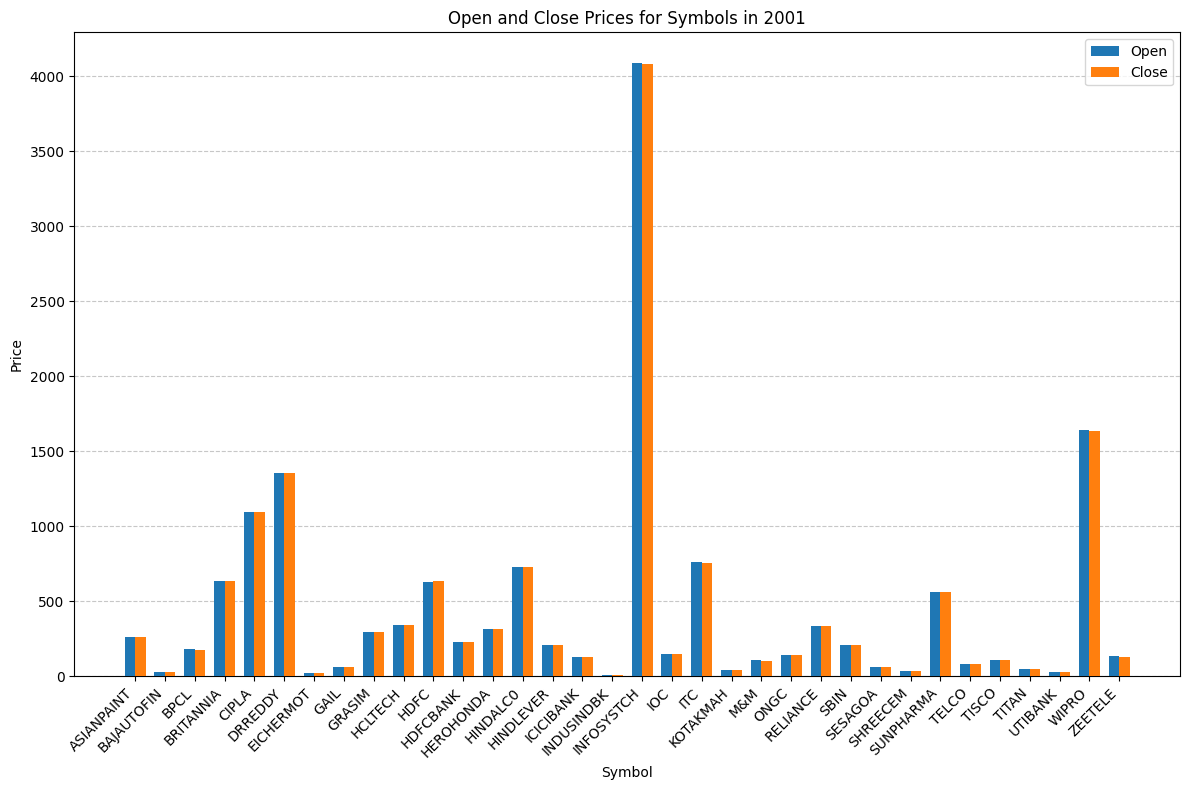

In [50]:
desired_year = 2001


df_year = df[df['Year'] == desired_year]

pivot_df = df_year.pivot_table(index='Symbol', columns='Year', values=['Open', 'Close'])

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
symbols = pivot_df.index
index = range(len(symbols))

open_prices = pivot_df[('Open', desired_year)].values
close_prices = pivot_df[('Close', desired_year)].values

ax.bar(index, open_prices, bar_width, label='Open', zorder=3)
ax.bar([x + bar_width for x in index], close_prices, bar_width, label='Close', zorder=3)

ax.set_xlabel('Symbol')
ax.set_ylabel('Price')
ax.set_title(f'Open and Close Prices for Symbols in {desired_year}')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(symbols, rotation=45, ha='right')
ax.set_xticklabels(symbols)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.tight_layout()
plt.show()




Area plot of the stock price of the companies over the years

                      Open      Close       Volume
Year Symbol                                       
2000 ASIANPAINT   172372.1   172441.2    7095056.0
     BAJAUTOFIN    16300.0    16271.2    1212928.0
     BPCL         111233.2   110748.7   42391238.0
     BRITANNIA    336739.2   336674.4    6515560.0
     CIPLA        471109.3   469052.0   44392620.0
     DRREDDY      684079.8   680003.0   46874944.0
     EICHERMOT     17604.2    17492.0    6115224.0
     GAIL           6962.5     6879.8    9777734.0
     GRASIM       143522.7   142963.1   98161148.0
     HCLTECH      677262.2   672325.2  103169412.0
     HDFC         229754.9   229623.7  109269290.0
     HDFCBANK     118499.2   118204.2   76717888.0
     HEROHONDA    469856.9   469062.7    6352422.0
     HINDALC0     390748.3   389553.5   25270350.0
     HINDLEVER    695011.9   692586.1  440242668.0
     ICICIBANK     88686.8    88169.9   91367416.0
     INDUSINDBK     3599.7     3548.2   23798298.0
     INFOSYSTCH  4181466.3  416

<Axes: xlabel='Year', ylabel='Total'>

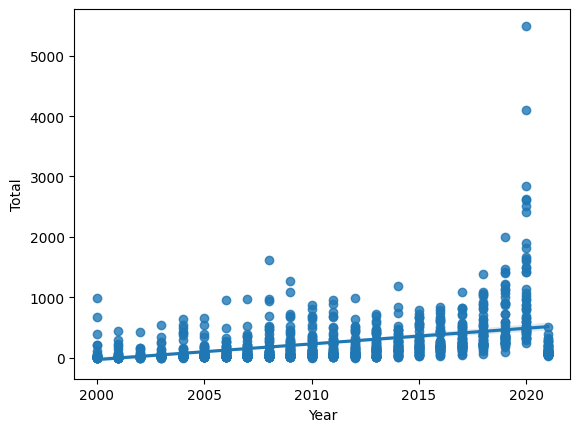

In [51]:
#calculate the total volume of stock traded for each year based on the open and close AVRG price
df.reset_index(inplace=True)
#df.set_index('Year', inplace=True)
df = df.loc[:, ['Year', 'Symbol', 'Open', 'Close', 'Volume']]
df = df.groupby(['Year', 'Symbol']).sum()
print(df.head(20))
open_colose_mean = df[['Open', 'Close']].mean(axis = 1)
df['Total'] = (df['Volume'] * open_colose_mean)/df['Volume'].sum()
df.reset_index(inplace=True)

sns.regplot(x= 'Year', y='Total', data=df)


ploting with seaborn

Plotting waffle chart

tab20
positions : [0.         0.04761905 0.0952381  0.14285714 0.19047619 0.23809524
 0.28571429 0.33333333 0.38095238 0.42857143 0.47619048 0.52380952
 0.57142857 0.61904762 0.66666667 0.71428571 0.76190476 0.80952381
 0.85714286 0.9047619  0.95238095 1.        ]
[[0.12156863 0.46666667 0.70588235 1.        ]
 [0.12156863 0.46666667 0.70588235 1.        ]
 [0.68235294 0.78039216 0.90980392 1.        ]
 [1.         0.49803922 0.05490196 1.        ]
 [1.         0.73333333 0.47058824 1.        ]
 [0.17254902 0.62745098 0.17254902 1.        ]
 [0.59607843 0.8745098  0.54117647 1.        ]
 [0.83921569 0.15294118 0.15686275 1.        ]
 [1.         0.59607843 0.58823529 1.        ]
 [0.58039216 0.40392157 0.74117647 1.        ]
 [0.77254902 0.69019608 0.83529412 1.        ]
 [0.54901961 0.3372549  0.29411765 1.        ]
 [0.76862745 0.61176471 0.58039216 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.96862745 0.71372549 0.82352941 1.        ]
 [0.49803922 0.49803922 0.4980

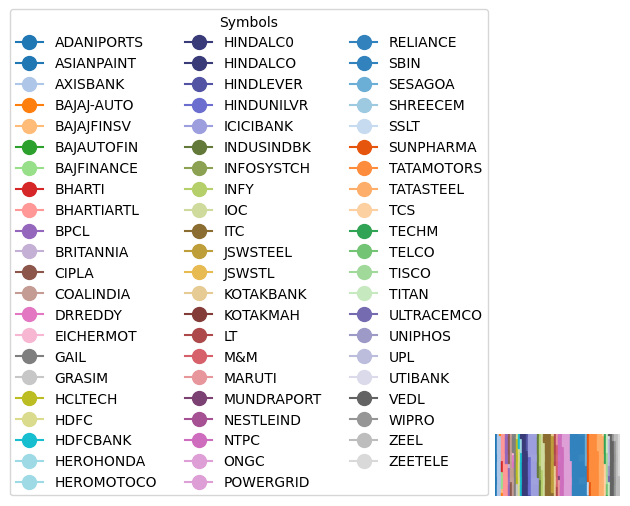

In [52]:
df.set_index('Symbol', inplace=True)
waffle_df = df.loc[:, ['Open', 'Close', 'Volume']]
waffle_df = waffle_df.groupby('Symbol').sum()

unique_symbols = waffle_df.index.unique()
num_symbols = len(unique_symbols)

colormaps = ['tab20', 'tab20b', 'tab20c']
colors_per_color_map = int(np.ceil(65 / len(colormaps))) # 65/3 = 21.6666

colors = []
for cmap in colormaps:
    print(cmap)
    colormap = plt.colormaps.get_cmap(cmap)
    # Generate equally spaced positions along the colormap
    positions = np.linspace(0, 1, colors_per_color_map)
    print(f'positions : {positions}')
    # Sample colors from the colormap at those positions
    sampled_colors = colormap(positions)
    print(sampled_colors)
    # Add the sampled colors to the colors list
    colors.extend(sampled_colors)


# Take only the required number of colors
colors = colors[:65]

color_dict = {}
for i, symbol in enumerate(unique_symbols):
    color_dict[symbol] = colors[i]


fig = plt.figure(
    FigureClass= Waffle,
    rows=30,
    columns =60,
    values=waffle_df['Volume'],
    colors=[color_dict[symbol] for symbol in waffle_df.index]
)

legend_handles = [
    plt.Line2D([0], [0], marker='o', color=color_dict[symbol], label=symbol, markersize=10)
    for symbol in waffle_df.index.unique()
]

# Add legend with handles and labels
plt.legend(handles=legend_handles, loc='lower right', bbox_to_anchor=(0, -0.1), title='Symbols', ncol=3)

plt.show()

Creating DashBoard

In [57]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go

# Ensure the correct column names
combined_dataset_path = '/content/datasets/combined_dataset.csv'

df1 = pd.read_csv(combined_dataset_path)

df1 = df1.dropna(subset=['Date'])

#remove rows with invalid date
date_pattern = r"\d{4}-\d{2}-\d{2}"
df1 = df1[df1['Date'].str.match(date_pattern)]

#remove rows with nan values
nan_columns = df1.columns[df1.isna().any()].tolist()
df1.drop(nan_columns, axis=1, inplace=True)

'''
Data Transformation
'''

#convert date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])
#replace date with year
df1['Date'] = df1['Date'].dt.year
#rename date column to year
df1.rename(columns={'Date': 'Year'}, inplace=True)


print(df1.head())
print(df1.columns)

# Grouping and summing the data
df1 = df1[['Year', 'Symbol', 'Open', 'Close', 'Volume']].groupby(['Year', 'Symbol']).sum().reset_index()

# Set the default year
desired_year = 2001  # Change this to the desired year

# Filter data for the default year
df_year = df1[df1['Year'] == desired_year]

# Create a pivot table to reshape the data
pivot_df = df_year.pivot_table(index='Symbol', columns='Year', values=['Open', 'Close'])

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Open and Close Prices Dashboard"),
    html.Div([
        html.Label("Select Year:"),
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': str(year), 'value': year} for year in df1['Year'].unique()],
            value=desired_year,
            placeholder="Select a year"
        )
    ]),
    dcc.Graph(id='price-chart')
])

# Define the callback to update the chart based on the selected year
@app.callback(
    Output('price-chart', 'figure'),
    [Input('year-dropdown', 'value')]
)
def update_chart(selected_year):
    # Filter data for the selected year
    df_year = df1[df1['Year'] == selected_year]

    # Create a pivot table to reshape the data
    pivot_df = df_year.pivot_table(index='Symbol', columns='Year', values=['Open', 'Close'])

    # Create traces for the bar chart
    traces = []
    for column in pivot_df.columns.levels[1]:
        traces.append(go.Bar(
            x=pivot_df.index,
            y=pivot_df[('Open', column)],
            name=f'{column} - Open'
        ))
        traces.append(go.Bar(
            x=pivot_df.index,
            y=pivot_df[('Close', column)],
            name=f'{column} - Close'
        ))

    # Set layout for the bar chart
    layout = go.Layout(
        barmode='group',
        xaxis=dict(tickangle=45, tickmode='array', tickvals=list(range(len(pivot_df.index))), ticktext=pivot_df.index)
    )

    # Create the figure
    figure = go.Figure(data=traces, layout=layout)

    return figure

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-57-db17eb1cd336>:10: DtypeWarning: Columns (12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(combined_dataset_path)


   Year      Symbol Series  Prev Close    Open    High     Low    Last  \
0  2004  ULTRACEMCO     EQ       10.00  305.00  340.00  253.25  259.00   
1  2004  ULTRACEMCO     EQ      260.20  262.00  264.70  249.20  255.00   
2  2004  ULTRACEMCO     EQ      255.55  257.75  272.50  256.00  270.10   
3  2004  ULTRACEMCO     EQ      270.70  272.00  272.55  260.65  261.35   
4  2004  ULTRACEMCO     EQ      262.25  263.70  269.00  262.05  267.00   

    Close    VWAP     Volume      Turnover  
0  260.20  268.80  6633956.0  1.783237e+14  
1  255.55  255.54  2794161.0  7.140107e+13  
2  270.70  267.00  2340926.0  6.250231e+13  
3  262.25  264.40   915106.0  2.419529e+13  
4  266.10  265.38   387417.0  1.028108e+13  
Index(['Year', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover'],
      dtype='object')


<IPython.core.display.Javascript object>